In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/4AHnfvnDsNrX-R7D_nEPKdvSXDs_Xx3XO0Cz4L2ZOAPJ3dzjyy_o_lk
Mounted at /content/drive


In [ ]:
%cd /content/drive/My\ Drive/VietOCR

/content/drive/My Drive/VietOCR


In [ ]:
!nvidia-smi

Fri Sep 11 02:37:52 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   78C    P0    34W /  70W |   6797MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
%cd data

/content/drive/My Drive/VietOCR/data


In [ ]:
!unzip data.zip

In [ ]:
!unzip test.zip

In [ ]:
! pip install --quiet vietocr==0.1.9

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg
from pathlib import Path

In [ ]:
%cd ..

/content/drive/My Drive/VietOCR


In [ ]:
train_path = Path('./data/data/')
test_path = Path('./data/test/')

train_img_path = [str(img_path) for img_path in train_path.glob("*.jpeg")]
test_img_path = [str(img_path) for img_path in test_path.glob("*.jpeg")]
print('Number of train data: ', len(train_img_path))
print('Number of test data: ', len(test_img_path))

Number of train data:  33638
Number of test data:  7309


In [ ]:
config = Cfg.load_config_from_name('vgg_transformer')

In [ ]:
# config['weights'] = './weights/transformerocr.pth'
config['weights'] = 'https://drive.google.com/uc?id=13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA'
config['device'] = 'cuda:0'
config['predictor']['beamsearch']=False

In [ ]:
detector = Predictor(config)

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


Cached Downloading: /root/.cache/gdown/https-COLON--SLASH--SLASH-drive.google.com-SLASH-uc-QUESTION-id-EQUAL-13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA
Downloading...
From: https://drive.google.com/uc?id=13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA
To: /root/.cache/gdown/tmptxyck7nn/dl
152MB [00:01, 102MB/s] 


In [ ]:
! gdown --id 1uMVd6EBjY4Q0G2IkU5iMOQ34X0bysm0b
! unzip  -qq -o sample.zip

Downloading...
From: https://drive.google.com/uc?id=1uMVd6EBjY4Q0G2IkU5iMOQ34X0bysm0b
To: /content/drive/My Drive/VietOCR/sample.zip
100% 306k/306k [00:00<00:00, 95.8MB/s]


In [ ]:
! ls sample | shuf |head -n 5

4448.jpg
2019_10_04_tran_quang_dung_201910041118369_29.jpg
037188000873.jpeg
465_Ecclesiastics_24500.jpg
deskewed-2019_12_17_dinh_ngoc_anh_201912171124175_6.jpg


'Thanh Xuân - Hà Nội - Việt Nam'

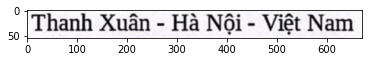

In [ ]:

img = './sample/deskewed-2019_12_17_dinh_ngoc_anh_201912171124175_6.jpg'
img = Image.open(img)
plt.imshow(img)
s = detector.predict(img)
s

In [ ]:
# download pretrained weighgt

# ! gdown https://drive.google.com/uc?id=1W2PZC94sjpA1lS7FN33VoIVleSnnWOaA
!gdown https://drive.google.com/uc?id=13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA

Downloading...
From: https://drive.google.com/uc?id=13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA
To: /content/drive/My Drive/VietOCR/transformerocr.pth
152MB [00:00, 164MB/s]


In [ ]:
!unzip data.zip

In [ ]:
%cd data/
from pathlib import Path
import os


train_data_path = Path('./data/')
test_data_path = Path('./test/')

with open('train_annotation.txt', 'w') as file:
    for img_path in train_data_path.glob("*.jpeg"):
        name = img_path.name[:-4]
        true_label = name.split('_')[0]  # [string_label]_[idx].jpeg
        true_label = true_label.strip()
        file.write(str(img_path) + '\t' + true_label + '\n')

with open('test_annotation.txt', 'w') as file:
    for img_path in test_data_path.glob("*.jpeg"):
        name = img_path.name[:-4]
        true_label = name.split('_')[0]  # [string_label]_[idx].jpeg
        true_label = true_label.strip()
        file.write(str(img_path) + '\t' + true_label + '\n')
%cd ..

/content/drive/My Drive/VietOCR/data
/content/drive/My Drive/VietOCR


**Train model**

In [ ]:
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer


In [ ]:
config = Cfg.load_config_from_name('vgg_transformer')

In [ ]:
dataset_params = {
    'name':'hw',
    'data_root':'./data/',
    'train_annotation':'train_annotation.txt',
    'valid_annotation':'test_annotation.txt'
}

params = {
         'print_every':200,
         'valid_every':15*200,
          'iters':50000,
          'checkpoint':'./checkpoint/transformerocr_checkpoint.pth',    
          'export':'./weights/transformerocr.pth',
          'metrics': 10000,
          'batch_size': 64
         }

params_opt = {
              'init_lr': 0.01,
              'n_warmup_steps': 4000
              }

config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cuda:0'

In [ ]:
config

{'backbone': 'vgg19_bn',
 'cnn': {'hidden': 256,
  'ks': [[2, 2], [2, 2], [2, 1], [2, 1], [1, 1]],
  'ss': [[2, 2], [2, 2], [2, 1], [2, 1], [1, 1]]},
 'dataloader': {'num_workers': 3, 'pin_memory': True},
 'dataset': {'data_root': './data/',
  'image_height': 32,
  'image_max_width': 512,
  'image_min_width': 32,
  'name': 'hw',
  'train_annotation': 'train_annotation.txt',
  'valid_annotation': 'test_annotation.txt'},
 'device': 'cuda:0',
 'optimizer': {'init_lr': 0.1, 'n_warmup_steps': 4000},
 'predictor': {'beamsearch': False},
 'pretrain': {'cached': '/tmp/tranformerorc.pth',
  'id_or_url': '13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA',
  'md5': 'fbefa85079ad9001a71eb1bf47a93785'},
 'quiet': False,
 'trainer': {'batch_size': 64,
  'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
  'export': './weights/transformerocr.pth',
  'iters': 50000,
  'log': './train.log',
  'metrics': 10000,
  'print_every': 200,
  'valid_every': 3000},
 'transformer': {'d_model': 256,
  'dim_feedforward':

In [ ]:
trainer = Trainer(config, pretrained=True)

Computing MD5: /tmp/tranformerorc.pth
MD5 matches: /tmp/tranformerorc.pth
train_hw exists. Remove folder if you want to create new dataset


train_hw build cluster: 100%|██████████████████████████████| 33637/33637 [00:00<00:00, 72947.30it/s]

valid_hw exists. Remove folder if you want to create new dataset



valid_hw build cluster: 100%|████████████████████████████████| 7308/7308 [00:00<00:00, 99358.74it/s]


In [ ]:
trainer.train()

iter: 000200 - train loss: 0.989 - lr: 4.94e-06 - load time: 0.34 - gpu time: 39.60
iter: 000400 - train loss: 0.745 - lr: 9.88e-06 - load time: 0.03 - gpu time: 39.58
iter: 000600 - train loss: 0.689 - lr: 1.48e-05 - load time: 0.58 - gpu time: 40.50
iter: 000800 - train loss: 0.663 - lr: 1.98e-05 - load time: 0.03 - gpu time: 40.24
iter: 001000 - train loss: 0.647 - lr: 2.47e-05 - load time: 0.03 - gpu time: 39.51
iter: 001200 - train loss: 0.632 - lr: 2.96e-05 - load time: 0.55 - gpu time: 39.09
iter: 001400 - train loss: 0.639 - lr: 3.46e-05 - load time: 0.03 - gpu time: 41.48
iter: 001600 - train loss: 0.646 - lr: 3.95e-05 - load time: 0.55 - gpu time: 39.39
iter: 001800 - train loss: 0.627 - lr: 4.45e-05 - load time: 0.03 - gpu time: 39.49
iter: 002000 - train loss: 0.623 - lr: 4.94e-05 - load time: 0.03 - gpu time: 39.58
iter: 002200 - train loss: 0.625 - lr: 5.44e-05 - load time: 0.47 - gpu time: 39.41
iter: 002400 - train loss: 0.625 - lr: 5.93e-05 - load time: 0.03 - gpu time